# Data Analysis 

Before we begin the feature selection step, it is important to analyze the data and see what kind of information we can decipher from the variables. In this notebook, we look at a popular dataset - the boston housing dataset - and determine whether we can understand information from the data. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 1460 samples of data, each representing the characteristics of a house with 81 different characteristics (variables) that we can use for training. We notice that there are many NaN values for a lot of the variables, so our first step is to determine the percentage of NaN values for each variable in the dataset

## NaN value analyzer  

In [18]:
data['PoolQC'].isnull() #This command lists out every value in a column if it is null or not (true or false). 
data['PoolQC'].isnull().sum() #This command calculates the total number of null values in a column 
data['PoolQC'].isnull().mean() #This calculates the mean number of null values. % of values that are NaN from the dataset
data['PoolQC'].isnull().any() #This tells you if there is any null value at all from these columns. 

#Hence, we can find using list comprehension the following: variable, for variable in every column if there is more than one nan in the col
var_nan = [var for var in data.columns if data[var].isnull().sum()>1]

for var in var_nan:
    print(var, np.round(data[var].isnull().mean(),3), '% of values missing')


LotFrontage 0.177 % of values missing
Alley 0.938 % of values missing
MasVnrType 0.005 % of values missing
MasVnrArea 0.005 % of values missing
BsmtQual 0.025 % of values missing
BsmtCond 0.025 % of values missing
BsmtExposure 0.026 % of values missing
BsmtFinType1 0.025 % of values missing
BsmtFinType2 0.026 % of values missing
FireplaceQu 0.473 % of values missing
GarageType 0.055 % of values missing
GarageYrBlt 0.055 % of values missing
GarageFinish 0.055 % of values missing
GarageQual 0.055 % of values missing
GarageCond 0.055 % of values missing
PoolQC 0.995 % of values missing
Fence 0.808 % of values missing
MiscFeature 0.963 % of values missing


## NaN determine usefulness of variables 

At this stage, we see that there are many values that are NaN. We want to see if the NaN values have an impact on the final output. Hence, for each variable, we want to plot the final cost vs each variable to see whether the information would make any valuable contribution or not. If we are dealing with binary variables, we plot them both. If there is no change between the plots for both variables, we can discard them. Else we can keep them as they would be a contributing factor.

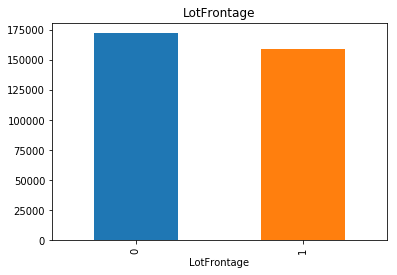

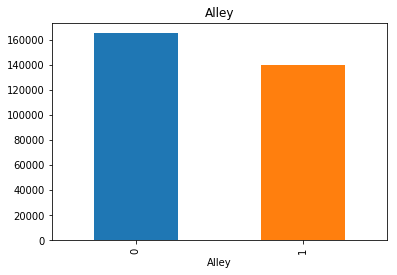

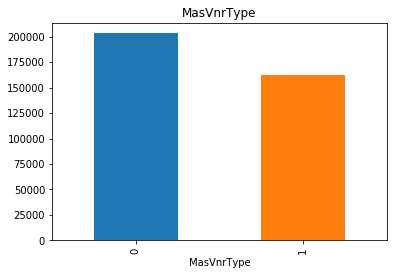

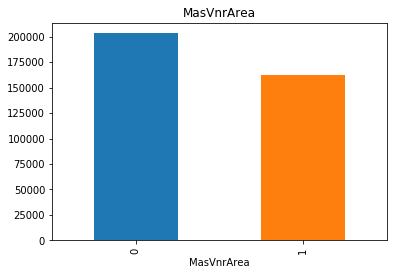

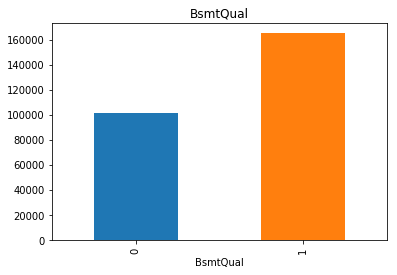

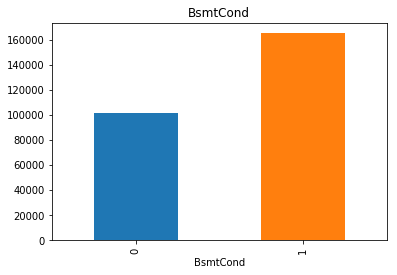

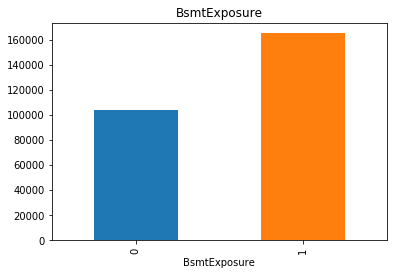

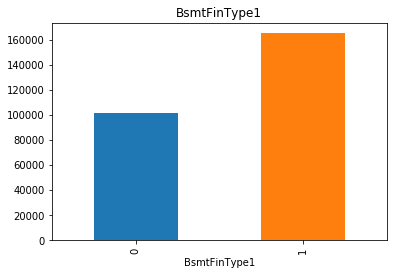

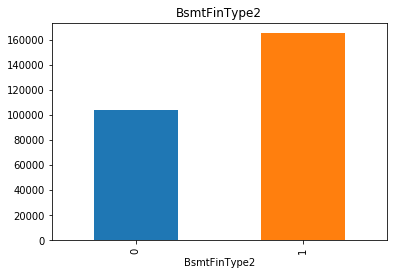

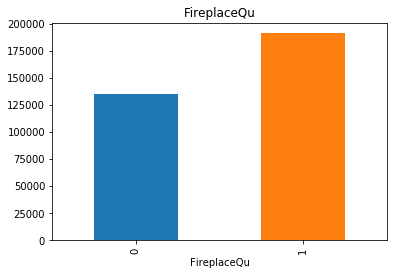

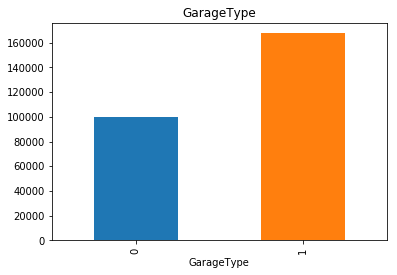

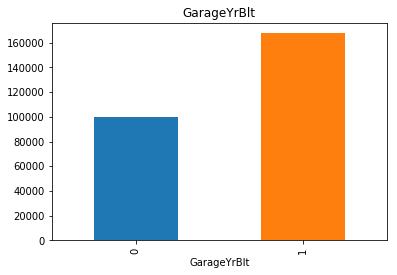

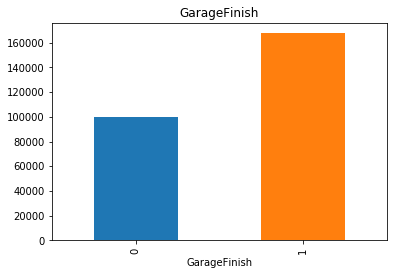

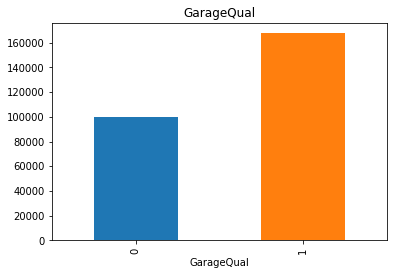

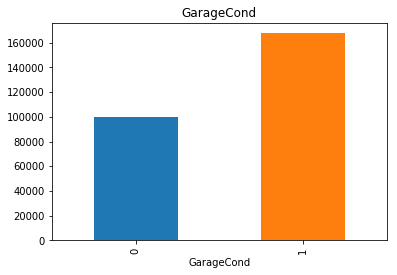

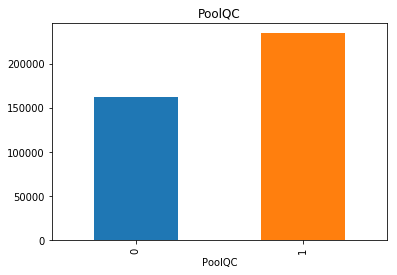

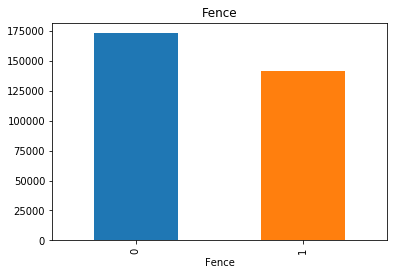

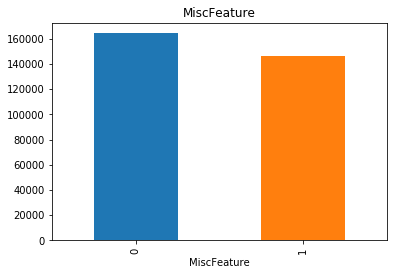

In [31]:
def analyze_nan(df,var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(),0,1)  #Replaces every instance of a NaN with a 0 and 1 otherwise. 
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in var_nan:
    analyze_nan(data,var)

## Temporal Variables 

We can take a look at the temporal variables and determine whether we might need them or discard them. For variables that include a temporal (time) element, it is better to extract a bit of information first instead of just taking the variables as they are. For example, instead of taking the year as simply, the year, we could take the difference and calculate the age. Let's look into it in more detail 

In [10]:
# list the temporal variables. In this case, we are just searching for the presence of keyword "Year" or "Yr"
year_vars = [var for var in data.columns if "Yr" in var or "Year" in var]
year_vars


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

printing out all the variables and their relationships

In [13]:
for var in year_vars:
    print(var, ":" , data[var].unique())

YearBuilt : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd : [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt : [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962.

Text(0.5, 1.0, 'Change of house prices from 2006-2010')

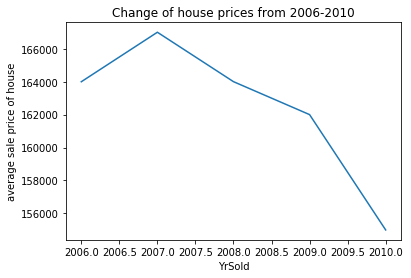

In [27]:
data.groupby('YrSold').mean() #This command takes all the years sold in the y axis and mean of every sample in that category
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('average sale price of house')
plt.title('Change of house prices from 2006-2010')

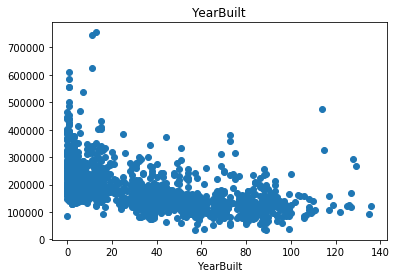

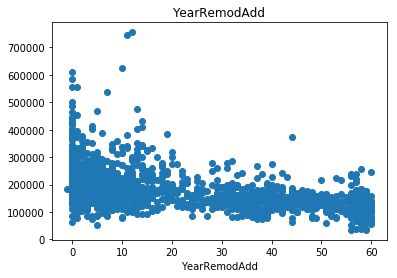

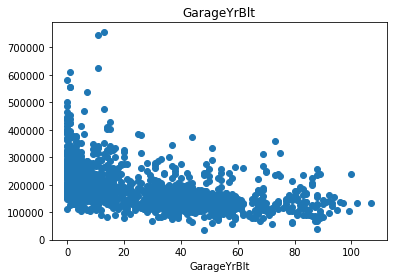

In [35]:
def analyze_years(df,var):
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    plt.scatter(df[var], df['SalePrice'])
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in year_vars:
    if 'YrSold' not in var:
        analyze_years(data,var)
    

Now let's look at all the graphs. We can immediately notice that the older the feature, the lower the price of the house. So there is definitely a relationship that we can capture between these temporal variables. 

## Discreet Variables 

Let's take all the discreet variables from the datacell and see if we can analyze them 

In [65]:
disc_var = [var for var in data.columns if len(data[var].unique()) < 20 and data[var].dtypes != 'O'] 
data[disc_var].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2,2008
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5,2007
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9,2008
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2,2006
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12,2008


Now we can plot each variable against the sale price to see if it makes a difference

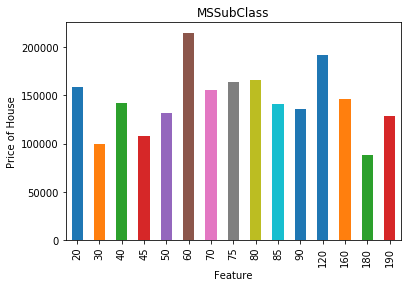

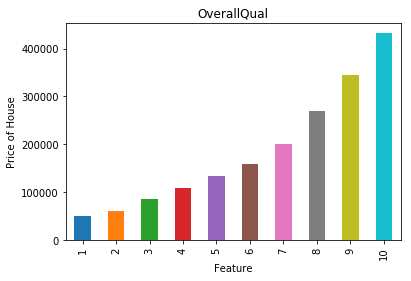

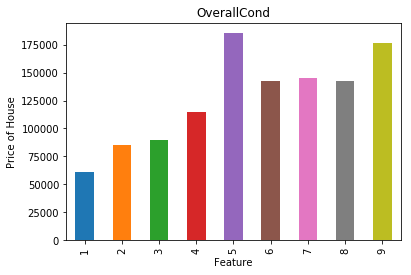

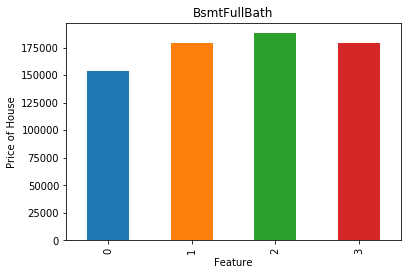

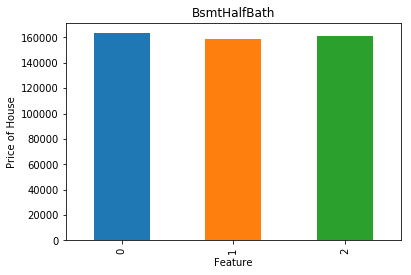

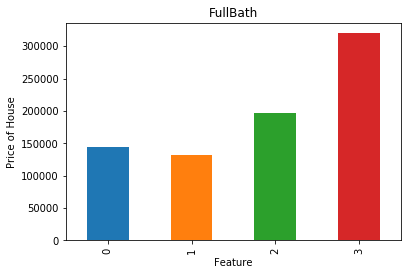

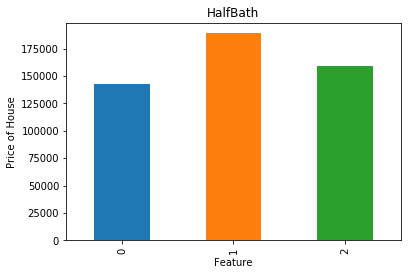

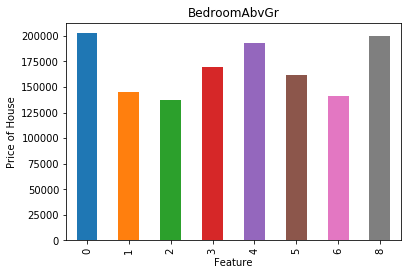

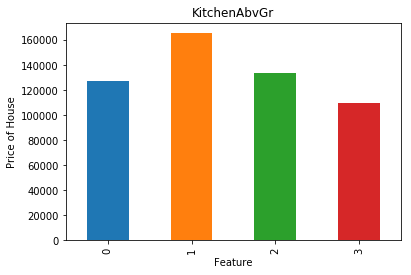

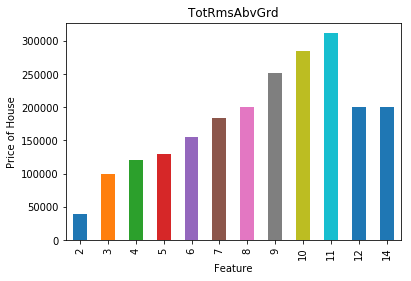

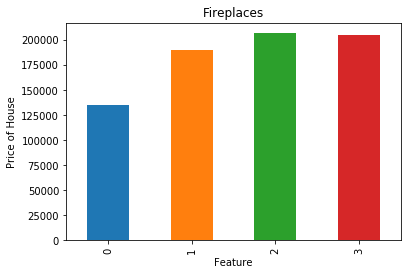

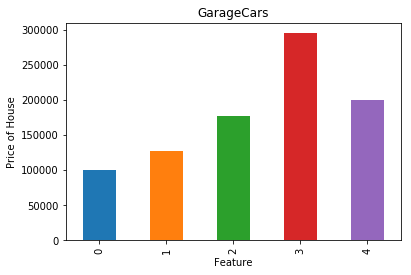

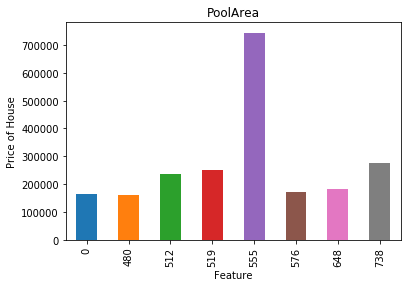

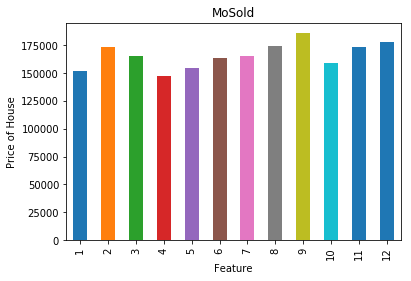

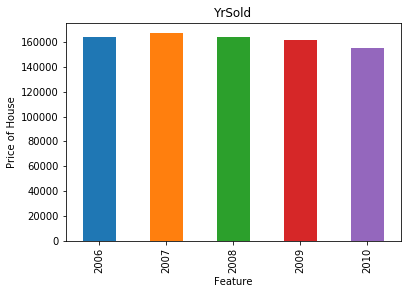

In [74]:
def analyze_disc(df,var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Price of House')
    plt.xlabel('Feature')
    plt.show()
    
for var in disc_var:
    analyze_disc(data,var)

We can now directly see which features contribute to a difference in the price of the house vs the features that do not contribute. Hence, we can take those features which make a difference in the price of the house between different values


# Continuous Variables 


Let's also take a look at the continuous variables and see how many samples we have and whether the variables are normally distributed. 

In [94]:
continuous_var = [var for var in data.columns if data[var].dtypes != 'O' and var not in year_vars and var not in disc_var+['Id']]
len(continuous_var)
data[continuous_var].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


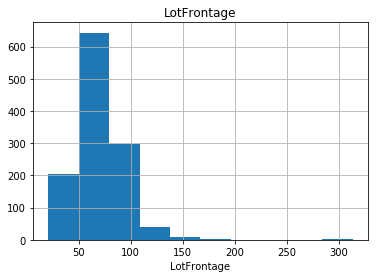

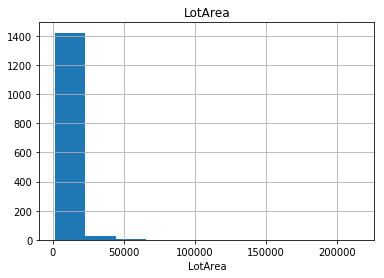

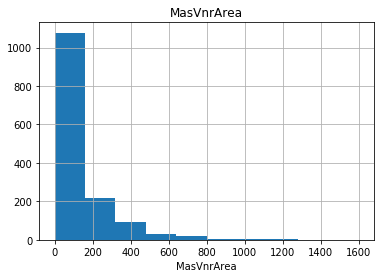

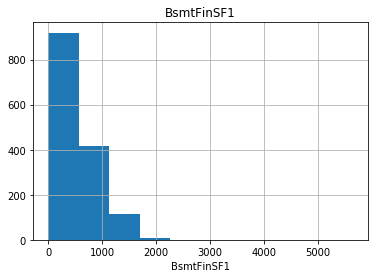

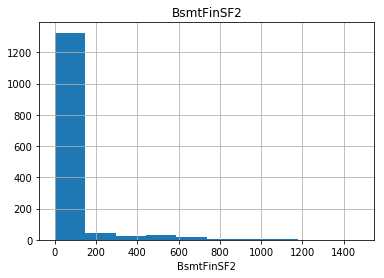

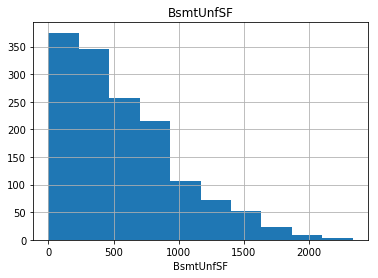

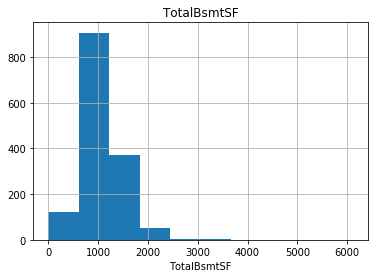

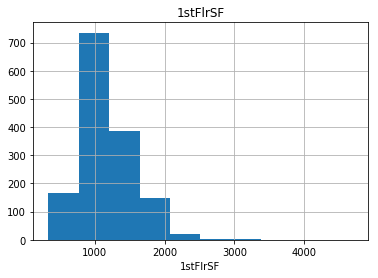

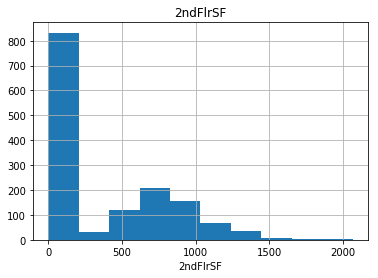

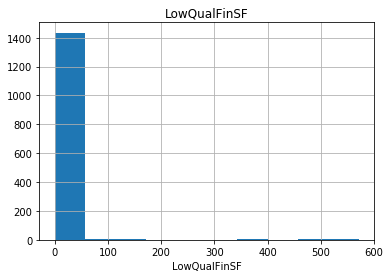

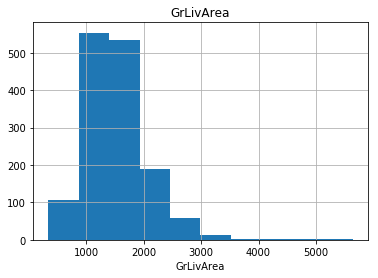

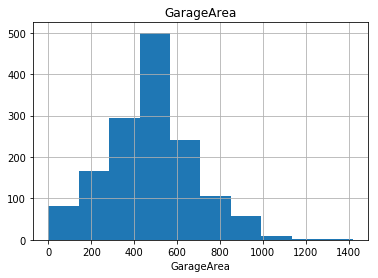

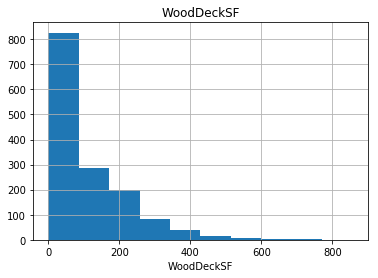

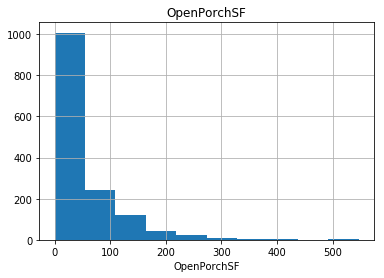

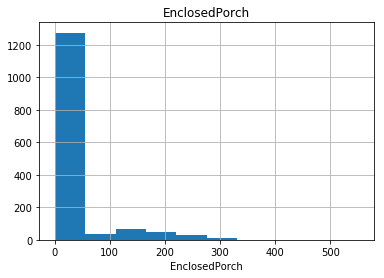

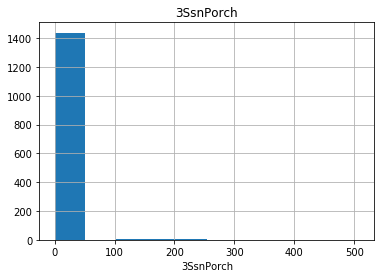

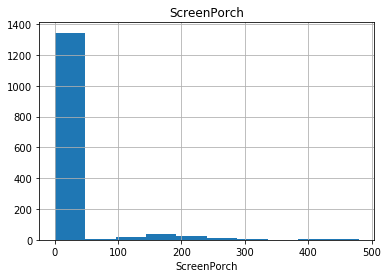

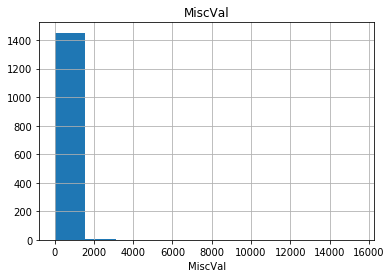

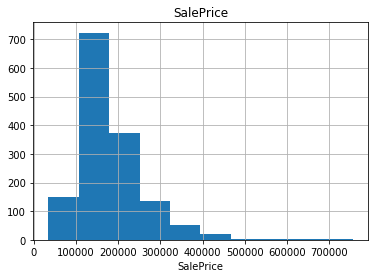

In [95]:
def analyze_cont(df,var):
    df = df.copy()
    df[var].hist()
    plt.xlabel(var)
    plt.title(var)
    plt.show()

for var in continuous_var:
    analyze_cont(data,var)

We can start seeing which variables we can directly ignore and drop for our analysis. Let's also take the log transform of the data

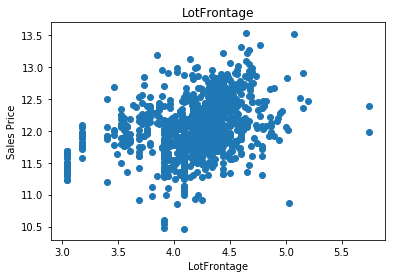

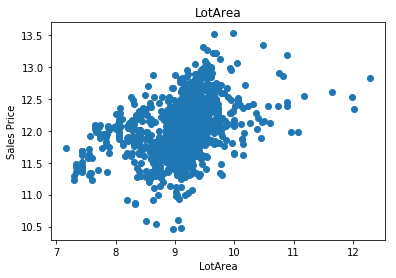

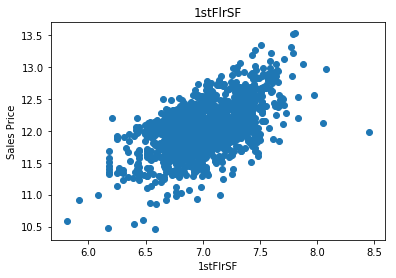

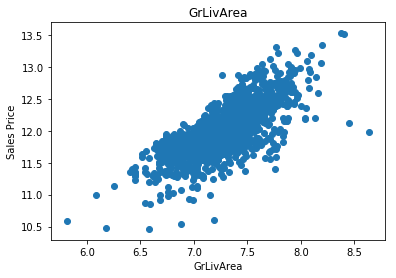

In [102]:
def cont_log(df,var):
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
    
        df[var] = np.log(df[var])
        df['SalePrice'] = np.log(df['SalePrice'])
        plt.scatter(df[var], df['SalePrice'])
        plt.xlabel(var)
        plt.title(var)
        plt.ylabel('Sales Price')
        plt.show()

for var in continuous_var:
    if var == 'SalePrice':
        pass
    else:
        cont_log(data,var)

# Categorical Variables 

We now also take a look at the categorical variables. The first thing we want to check for is cardinality. This refers to the number of categories in each categorical variable.

In [112]:
cat_var = [var for var in data.columns if data[var].dtypes == 'O']

for var in cat_var:
    print(var, ":", len(data[var].unique()))

MSZoning : 5
Street : 2
Alley : 3
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 5
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
KitchenQual : 4
Functional : 7
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 6
GarageCond : 6
PavedDrive : 3
PoolQC : 4
Fence : 5
MiscFeature : 5
SaleType : 9
SaleCondition : 6


We see that there are not that many categories for each feature. Let's also check for labels which do not show up very often in the data 

In [117]:
def rare_lab(df,var, p):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count()/ len(df)
    return tmp[tmp<p]

for var in cat_var:
    print(rare_lab(data,var,0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Now that we understand what the rare labels are, we can start looking at ignoring the rare labels 